<a href="https://colab.research.google.com/github/farhanalfaa/covid19-visualization/blob/master/Tugas%20Besar%20Visualisasi%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Daily Additional Number of COVID-19 in Indonesia**
---
- Farhan Alfariqi (1301161770)
- Fikhri Masri (1301164662)
- Taufik Fathurahman (1301160790)

## **1. Import Important Library**

In [0]:
import numpy as np
import pandas as pd

In [0]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, output_file
from bokeh.models import ColumnDataSource, HoverTool, CheckboxGroup, CustomJS, Panel, Tabs, Slider
from bokeh.transform import dodge
from bokeh.layouts import row
from bokeh.plotting import Figure
from bokeh.layouts import column
from bokeh.palettes import Viridis3
output_notebook()

## **2. Handle Dataset**

> Membaca dataset daily additional covid yang akan digunakan

In [0]:
df_kasusharian = pd.read_csv('https://raw.githubusercontent.com/farhanalfaa/covid19-visualization/master/dataset/Indo/Kasus%20Harian%20(1).csv')
df_kasus_usia = pd.read_csv("https://raw.githubusercontent.com/farhanalfaa/covid19-visualization/master/dataset/Indo/Jumlah%20Kasus%20Berdasarkan%20Kelompok%20Usia.csv")
df_kumulatif_asean = pd.read_csv("https://raw.githubusercontent.com/farhanalfaa/covid19-visualization/master/dataset/Indo/Jumlah%20Kumulatif.csv")
df_cases_time = pd.read_csv("https://raw.githubusercontent.com/farhanalfaa/covid19-visualization/master/dataset/Indo/cases%20timeseries%20asean.csv")
df_recovered = pd.read_csv("https://raw.githubusercontent.com/farhanalfaa/covid19-visualization/master/dataset/Indo/Recovered%20Asean.csv")
df_death = pd.read_csv("https://raw.githubusercontent.com/farhanalfaa/covid19-visualization/master/dataset/Indo/death%20asean.csv")
df_kasus_1 = pd.read_csv("https://raw.githubusercontent.com/farhanalfaa/covid19-visualization/master/dataset/Indo/cases%20timeseries%20asean.csv")
df_provinsi   = pd.read_csv('https://raw.githubusercontent.com/farhanalfaa/covid19-visualization/master/dataset/Indo/data%20provinsi.csv')

In [4]:
df_kasusharian.head()

,DT,Kasus (Kumulatif),Kasus Baru,Sembuh (baru),Meninggal (baru)
0,2020-03-02 00:00:00,2,2.0,NaN,NaN
1,2020-03-03 00:00:00,2,NaN,NaN,NaN
2,2020-03-04 00:00:00,2,NaN,NaN,NaN
3,2020-03-05 00:00:00,2,NaN,NaN,NaN
4,2020-03-06 00:00:00,4,2.0,NaN,NaN


> Melakukan preprocess data untuk menghilangkan missing value dan value data yang masih belum sesuai seperti format waktu.

In [0]:
def convert_date(x):
    return pd.to_datetime(x.split(' ')[0])

In [0]:
df_kasusharian['DT'] = df_kasusharian['DT'].apply(convert_date)

df_kasusharian = df_kasusharian.fillna(0)

df_kasusharian['Month'] = pd.DatetimeIndex(df_kasusharian['DT']).month

df_kasusharian = df_kasusharian.groupby(['Month', 'DT']).max()

df_kasusharian.rename(columns={"Kasus (Kumulatif)" : "KasusKumulatif", 
                               "Kasus Baru" : "KasusBaru",
                               "Sembuh (baru)" : "Sembuh",
                               "Meninggal (baru)" : "Meninggal"
                               }, inplace = True)

In [7]:
df_kasusharian.head()

KasusKumulatif  KasusBaru  Sembuh  Meninggal
Month DT                                                      
3     2020-03-02               2        2.0     0.0        0.0
      2020-03-03               2        0.0     0.0        0.0
      2020-03-04               2        0.0     0.0        0.0
      2020-03-05               2        0.0     0.0        0.0
      2020-03-06               4        2.0     0.0        0.0

In [0]:
def create_dataset(df): 
    '''
    Membuat dataset agar siap untuk digunakan dalam melakukan visualisasi.
    '''  
    df_maret_kasus = df.loc[3]
    df_maret_kasus = df_maret_kasus.sort_values(by='DT')
    source_maret_kasus = ColumnDataSource(df_maret_kasus)

    df_april_kasus = df.loc[4]
    df_april_kasus = df_april_kasus.sort_values(by='DT')
    source_april_kasus = ColumnDataSource(df_april_kasus)

    df_overall_kasus = df.loc[3]
    df_overall_kasus = df_overall_kasus.append(df.loc[4])
    df_overall_kasus = df_overall_kasus.sort_values(by='DT')
    source_overall = ColumnDataSource(df_overall_kasus)

    return source_maret_kasus, source_april_kasus, source_overall

## **3. Visualisasi COVID-19 Trend**

In [0]:
def create_plot(source, bulan='Overall'):
    '''
    Membuat plot untuk dataset yang akan divisualisasikan
    '''
    plot = figure(x_axis_type="datetime", title="{} Trend".format(bulan), plot_width=1000, plot_height=500)

    l0 = plot.line(x='DT', y='KasusBaru', line_color='red', source=source, legend_label='Kasus Baru')
    c0 = plot.circle(x='DT', y='KasusBaru', fill_color="white", size=8, source=source)   

    l1 = plot.line(x='DT', y='Sembuh', line_color='green', source=source, legend_label='Sembuh')
    c1 = plot.circle(x='DT', y='Sembuh', fill_color="white", size=8, source=source)      

    l2 = plot.line(x='DT', y='Meninggal', line_color='black', source=source, legend_label='Meninggal')
    c2 = plot.circle('DT', y='Meninggal', fill_color="white", size=8, source=source)      

    l3 = plot.line(x='DT', y='KasusKumulatif', line_color='blue', source=source, legend_label='Kumulatif Kasus')
    c3 = plot.circle(x='DT', y='KasusKumulatif', fill_color="white", size=8, source=source)

    plot.legend.location = "top_left"
    plot.add_tools(HoverTool(tooltips=[("# Kasus Baru", "@KasusBaru"), ("# Sembuh_(baru)", "@Sembuh"), 
                                       ("# Meninggal (baru)", "@Meninggal"), ("# Kasus (Kumulatif)", "@KasusKumulatif")]))
    
    return plot, [l0, l1, l2, l3, c0, c1, c2, c3]

In [0]:
def visual_overall_tren(source, bulan='Overall'):
    '''
    Memvisualisasikan tren dari covid-19 secara keseluruhan dengan menambahkan opsi widget checkbbox
    '''
    my_plot, my_lst = create_plot(source, bulan)
    l0, l1, l2, l3, c0, c1, c2, c3 = my_lst

    checkbox = CheckboxGroup(labels=["Kasus Baru", "Sembuh", "Meninggal", "Kumulatif Kasus"], 
                             active=[0, 1, 2, 3], width=200)
    checkbox.callback = CustomJS(args=dict(l0=l0, l1=l1, l2=l2, l3=l3, c0=c0, c1=c1, c2=c2, c3=c3, checkbox=checkbox),
                             code="""                                
                                  l0.visible = 0 in checkbox.active;
                                  l1.visible = 1 in checkbox.active;
                                  l2.visible = 2 in checkbox.active;
                                  l3.visible = 3 in checkbox.active;
                                  c0.visible = 0 in checkbox.active;
                                  c1.visible = 1 in checkbox.active;
                                  c2.visible = 2 in checkbox.active;
                                  c3.visible = 3 in checkbox.active;
                                  """)
    return my_plot, checkbox

In [11]:
source_maret_kasus, source_april_kasus, source_overall = create_dataset(df_kasusharian)

my_plot, checkbox = visual_overall_tren(source_overall, 'Overall')
layout = row(checkbox, my_plot)
show(layout)

In [0]:
def visual_eachmonth():
    '''
    Memvisualisasikan trand pertambahan dari COVID-19 berdasarkan bulannya
    '''
    source_maret_kasus, source_april_kasus, source_overall = create_dataset(df_kasusharian)

    my_plot1, _ = create_plot(source_maret_kasus, 'Maret')
    tab1 = Panel(child=my_plot1, title="Maret")

    my_plot2, _ = create_plot(source_april_kasus, 'April')
    tab2 = Panel(child=my_plot2, title="April")

    tabs = Tabs(tabs=[tab1, tab2])
    show(tabs)

In [13]:
visual_eachmonth()

In [0]:
def visual_addoffset():
    '''
    Menambahkan offset pada data dengan widget slider
    '''
    y = list(df_kasusharian['KasusKumulatif'])
    x = list(np.arange(len(df_kasusharian['KasusKumulatif'])))
    source = ColumnDataSource(data=dict(x=x, y=y))
    plot = Figure(plot_width=1000, plot_height=500)
    plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
    handler = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var f = cb_obj.value
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = y[i]+f
    }
    source.change.emit();
    """)
    slider = Slider(start=-2000, end=2000, value=0, step=100, title="Offset")
    slider.js_on_change('value', handler)
    layout = column(slider, plot)
    show(layout)

In [0]:
visual_addoffset()

## **4. Jumlah Kasus Berdasarkan Usia di Indonesia**


In [17]:
df_kasus_usia.rename(columns={"Jumlah Kasus": "JumlahKasus"}, inplace = True)
output_notebook()
source = ColumnDataSource(df_kasus_usia)
usia = source.data['Usia Group'].tolist()
p = figure(x_range=usia, plot_height=500, plot_width=1000, title="Jumlah Kasus Berdasarkan Usia di Indonesia")
p.vbar(x='Usia Group', top='JumlahKasus', source=source, width=0.9)
p.xgrid.grid_line_color = None
p.xaxis.axis_label = 'Usia'
p.yaxis.axis_label = 'Jumlah'
p.y_range.start = 0
hover = HoverTool()
hover.tooltips = [
    ("Jumlah Kasus", "@JumlahKasus Pasien")]

hover.mode = 'vline'
output_file("4.html")
p.add_tools(hover)

show(p)

## **5 Jumlah Kasus Perhari pada negara ASEAN dan Kumulatif**


In [18]:
df_cases_time.set_index('Country/Region', inplace =True)
df_cases_time.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)
df_cases_time.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Indonesia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,227,311,369,450,514,579,686,790,893,1046,1155,1285,1414,1528,1677,1790,1986,2092,2273,2491,2738,2956,3293,3512,3842,4241,4557,4839,5136,5516,5923,6248,6575,6760,7135,7418,7775,8211,8607,8882
Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,...,313,345,385,432,455,509,558,631,683,732,802,844,879,926,1000,1049,1114,1189,1309,1375,1481,1623,1910,2108,2299,2532,2918,3252,3699,4427,5050,5992,6588,8014,9125,10141,11178,12075,12693,13624
Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,...,212,272,322,411,599,721,827,934,1045,1136,1245,1388,1524,1651,1771,1875,1978,2067,2169,2220,2258,2369,2423,2473,2518,2551,2579,2613,2643,2672,2700,2733,2765,2792,2811,2826,2839,2907,2907,2922
Cambodia,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,35,37,51,53,84,87,91,96,96,99,99,103,107,109,109,110,114,114,114,114,115,117,119,119,120,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,75,85,91,94,113,123,134,141,153,163,174,188,203,212,218,233,237,240,241,245,249,251,255,257,258,262,265,266,267,268,268,268,268,268,268,268,268,270,270,270
Philippines,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,202,217,230,307,380,462,552,636,707,803,1075,1418,1546,2084,2311,2633,3018,3094,3246,3660,3764,3870,4076,4195,4428,4648,4932,5223,5453,5660,5878,6087,6259,6459,6599,6710,6981,7192,7294,7579
Laos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,3,6,6,8,8,8,9,10,10,10,10,11,12,14,15,16,16,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,...,790,900,1030,1183,1306,1518,1624,1796,2031,2161,2320,2470,2626,2766,2908,3116,3333,3483,3662,3793,3963,4119,4228,4346,4530,4683,4817,4987,5072,5182,5251,5305,5389,5425,5482,5532,5603,5691,5742,5780


In [0]:
df_stack = df_cases_time.stack().reset_index().rename(columns={'level_1' : 'Time', 0 : 'Cases'})
df_stack['Time'] = pd.to_datetime(df_stack['Time'])
df_indo = df_stack[df_stack['Country/Region']=='Indonesia'][["Time", "Cases"]]
df_singa = df_stack[df_stack['Country/Region']=='Singapore'][["Time", "Cases"]]
df_thai = df_stack[df_stack['Country/Region']=='Thailand'][["Time", "Cases"]]
df_camb = df_stack[df_stack['Country/Region']=='Cambodia'][["Time", "Cases"]]
df_viet = df_stack[df_stack['Country/Region']=='Vietnam'][["Time", "Cases"]]
df_phil = df_stack[df_stack['Country/Region']=='Philippines'][["Time", "Cases"]]
df_laos = df_stack[df_stack['Country/Region']=='Laos'][["Time", "Cases"]]
df_malay = df_stack[df_stack['Country/Region']=='Malaysia'][["Time", "Cases"]]

In [22]:
output_notebook()
p = figure(x_axis_type="datetime", plot_width=1000, plot_height=450, title = 'Kasus ASEAN Time Series')
props = dict(line_width=4, line_alpha=0.7)
indo = p.line(df_indo['Time'], df_indo['Cases'],color=Viridis3[0], legend_label="Indonesia", **props)
singa = p.line(df_singa['Time'], df_singa['Cases'],color=Viridis3[1], legend_label="Singapore", **props)
thai = p.line(df_thai['Time'], df_thai['Cases'],color=Viridis3[2], legend_label="Thailand", **props)
camb = p.line(df_camb['Time'], df_camb['Cases'],color='black', legend_label="Cambodia", **props)
viet = p.line(df_viet['Time'], df_viet['Cases'],color='brown', legend_label="Vietnam", **props)
phil = p.line(df_phil['Time'], df_phil['Cases'],color='darkred', legend_label="Phillipines", **props)
laos = p.line(df_laos['Time'], df_laos['Cases'],color='blue', legend_label="Laos", **props)
malay = p.line(df_malay['Time'], df_malay['Cases'],color='gold', legend_label="Malaysia", **props)
p.legend.location = "top_left"
checkbox = CheckboxGroup(labels=["Indonesia", "Singapore", "Thailand", "Cambodia", "Vietnam", "Phillipines", "Laos", "Malaysia"],
                         active=[0, 1, 2, 3, 4, 5, 6, 7], width=100)
checkbox.callback = CustomJS(args=dict(indo=indo, singa=singa, thai=thai, camb=camb, viet=viet, phil=phil, laos= laos, malay=malay,checkbox=checkbox),
                             code="""
                                  indo.visible = 0 in checkbox.active;
                                  singa.visible = 1 in checkbox.active;
                                  thai.visible = 2 in checkbox.active;
                                  camb.visible = 3 in checkbox.active;
                                  viet.visible = 4 in checkbox.active;
                                  phil.visible = 5 in checkbox.active;
                                  laos.visible = 6 in checkbox.active;
                                  malay.visible = 7 in checkbox.active;
                                  """)
tab1 = Panel(child = p, title = 'Kasus Perhari')

source = ColumnDataSource(df_kumulatif_asean)
countries = source.data['Country/Region'].tolist()
plot = figure(x_range=countries, plot_height=500, plot_width=1000, title="Jumlah Kasus di ASEAN")
plot.vbar(x='Country/Region', top='Cases', source=source, width=0.9)
plot.xgrid.grid_line_color = None
plot.xaxis.axis_label = 'Country'
plot.yaxis.axis_label = 'Jumlah'
plot.y_range.start = 0
hover = HoverTool()
hover.tooltips = [
    ("Jumlah Kasus", "@Cases Orang")]

hover.mode = 'vline'

plot.add_tools(hover)
tab2 = Panel(child = plot, title = 'Kumulatif Kasus')

tabs = Tabs(tabs=[ tab1, tab2 ])

# show(tabs)
output_file("2.html")

layout = row(checkbox,tabs)
show(layout)

## **6. Jumlah Kasus, Sembuh, dan korban**

In [23]:
# df_recovered.set_index('Country/Region', inplace =True)
df_recovered.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)
df_recovered.head(10)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,Indonesia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,15,15,29,29,30,31,35,46,59,64,75,81,103,112,134,150,164,192,204,222,252,282,286,359,380,426,446,548,607,631,686,747,842,913,960,1002,1042,1107,1151
1,Singapore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,9,15,15,17,18,18,24,29,34,34,37,37,51,51,53,62,62,62,72,...,114,124,140,144,144,156,160,172,183,198,212,228,240,245,266,282,297,320,344,377,406,460,492,528,560,586,611,652,683,708,740,768,801,839,896,924,956,1002,1060,1095
2,Thailand,0,0,0,0,2,2,5,5,5,5,5,5,5,5,5,5,5,10,10,10,10,10,12,12,12,14,15,15,15,15,17,17,21,21,22,22,22,28,28,...,42,42,42,44,44,52,70,88,97,97,97,229,342,505,505,612,674,793,793,888,888,940,1013,1135,1218,1288,1405,1497,1593,1689,1787,1928,1999,2108,2352,2430,2547,2547,2594,2609
3,Cambodia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,4,10,10,11,13,21,21,23,25,34,35,50,50,53,58,63,62,72,75,77,77,91,96,98,98,103,105,107,110,110,110,117,117,117,119
4,Vietnam,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,16,16,16,...,16,16,17,17,17,17,17,20,20,21,25,55,58,63,75,85,90,90,95,123,126,128,144,144,144,146,169,171,177,198,201,202,214,216,223,224,220,225,225,225
5,Philippines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,8,8,13,17,17,20,26,28,31,35,42,42,49,50,51,52,57,64,73,84,96,124,140,157,197,242,295,353,435,487,516,572,613,654,693,722,762,792,862,932
6,Laos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,2,2,4,4,4,7,7,7
7,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,7,7,7,13,15,15,15,15,15,18,18,18,18,18,18,...,75,87,114,139,139,183,199,215,259,320,388,479,537,645,767,827,915,1005,1241,1321,1487,1608,1830,1995,2108,2276,2478,2647,2766,2967,3102,3197,3295,3349,3452,3542,3663,3762,3862,3957


In [0]:
df_kum = df_recovered[["Country/Region","4/26/20"]]

In [25]:
df_kum.rename(columns={"4/26/20" : "Jumlah_Recovered"}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
df_kum_death = df_death[["Country/Region","4/26/20"]]
df_kum_death.rename(columns={"4/26/20" : "Jumlah_Death"}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df_kum_case = df_kasus_1[["Country/Region","4/26/20"]]
df_kum_case.rename(columns={"4/26/20" : "Jumlah_case"}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
data = {'country'    : df_kum_death['Country/Region'].tolist(),
        'Kasus'       : df_kum_case['Jumlah_case'].tolist(),
        'Sembuh'      : df_kum['Jumlah_Recovered'].tolist(),
        'Meninggal'   : df_kum_death['Jumlah_Death'].tolist()}
colors = ["#c9d9d3", "#718dbf", "#e84d60"]

In [29]:
source = ColumnDataSource(data=data)
country = source.data['country']
p = figure(x_range=country, y_range=(0, 15000), plot_height=500, plot_width=2000, title="Data Covid-19 ASEAN", toolbar_location="left")

p.vbar(x=dodge('country', -0.25, range=p.x_range), top='Kasus', width=0.2, source=source,
       color="#c9d9d3", legend_label="Kasus")

p.vbar(x=dodge('country',  0.0,  range=p.x_range), top='Sembuh', width=0.2, source=source,
       color="#718dbf", legend_label="Sembuh")

p.vbar(x=dodge('country',  0.25, range=p.x_range), top='Meninggal', width=0.2, source=source,
       color="#e84d60", legend_label="Meninggal")

p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

# Tick labels
p.xaxis.major_label_text_font_size = '20pt'
p.yaxis.major_label_text_font_size = '20pt'
hover = HoverTool()
hover.tooltips = [
    ("Jumlah Kasus", "@Kasus Pasien"),
    ("Jumlah Sembuh", "@Sembuh Pasien"),
    ("Jumlah Meninggal", "@Meninggal Pasien")]

hover.mode = 'vline'
tab3 = Panel(child = p, title = 'Jumlah Kasus Covid-19 ASEAN')

country_1 = df_kum_death['Country/Region'].tolist()
kasuss = ['Kasus', 'Sembuh', 'Meninggal']

plot = figure(x_range=country_1, y_range=(0, 15000), plot_height=700, plot_width=1000, title="Data Covid-19 ASEAN", toolbar_location="left", tooltips="$name: @$name")
plot.vbar_stack(kasuss, x='country', width=0.9, color=colors, source=data,
             legend_label=kasuss)

plot.y_range.start = 0
plot.x_range.range_padding = 0.1
plot.xgrid.grid_line_color = None
plot.axis.minor_tick_line_color = None
plot.outline_line_color = None
plot.legend.location = "top_left"
plot.legend.orientation = "horizontal"

tab4 = Panel(child = plot, title = 'Jumlah Kasus Covid-19 ASEAN')
tabs = Tabs(tabs=[ tab3, tab4])

output_file("1.html")
p.add_tools(hover)
layout = row(tabs)
show(layout)

In [30]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 47.7MB/s 
     |████████████████████████████████| 14.7MB 263kB/s 


## **7. Visualisasi Keseluruhan Data Covid-19 di Indonesia**

In [33]:
output_notebook()

data = {'provinsi'    : df_provinsi['Provinsi_Asal'].tolist(),
        'Kasus'       : df_provinsi['Kasus'].tolist(),
        'Sembuh'      : df_provinsi['Sembuh'].tolist(),
        'Meninggal'   : df_provinsi['Meninggal'].tolist()}

source = ColumnDataSource(data=data)

p = figure(x_range=df_provinsi['Provinsi_Asal'].tolist(), y_range=(0, 1000), plot_height=500, plot_width=2000, title="Data Persebaran Virus COVID-19 di Indonesia", toolbar_location="left")

p.vbar(x=dodge('provinsi', -0.25, range=p.x_range), top='Kasus', width=0.2, source=source,
       color="#c9d9d3", legend_label="Kasus")

p.vbar(x=dodge('provinsi',  0.0,  range=p.x_range), top='Sembuh', width=0.2, source=source,
       color="#718dbf", legend_label="Sembuh")

p.vbar(x=dodge('provinsi',  0.25, range=p.x_range), top='Meninggal', width=0.2, source=source,
       color="#e84d60", legend_label="Meninggal")

p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

# Tick labels
p.xaxis.major_label_text_font_size = '6pt'
p.yaxis.major_label_text_font_size = '10pt'

hover = HoverTool()
hover.tooltips = [
    ("Jumlah Kasus", "@Kasus Pasien"),
    ("Jumlah Sembuh", "@Sembuh Pasien"),
    ("Jumlah Meninggal", "@Meninggal Pasien")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

## **8. Visualisasi Keseluruhan Data Covid-19 berdasarkan Wiliayah di Indonesia**

In [0]:
def set_style(p):
  # Tick labels
  p.xaxis.major_label_text_font_size = '6pt'
  p.yaxis.major_label_text_font_size = '10pt'

### Pada wilayah Sumatera

In [0]:
df_sumatera   = df_provinsi.iloc[[10, 11, 14, 16, 20, 22, 25, 31, 32, 33], :]
df_jawa       = df_provinsi.iloc[[0, 1, 2, 3, 5, 17], :]
df_kalnusteng = df_provinsi.iloc[[8, 12, 13, 15, 18, 6, 7, 34], :]
df_sulmalpap  = df_provinsi.iloc[[4, 19, 21, 23, 24, 30, 27, 28, 9, 29], :]

In [37]:
fig1 =figure(title="Data Kasus Positif COVID-19 di Sumatera", x_range=df_sumatera['Provinsi_Asal'].tolist(), plot_width=800, plot_height=300)
fig1.vbar(x=df_sumatera['Provinsi_Asal'].tolist(), top=df_sumatera['Kasus'].tolist(), width=0.8, color='yellow')
tab1 = Panel(child=fig1, title="Kasus")

fig2 =figure(title="Data Pasien Sembuh dari COVID-19 di Sumatera", x_range=df_sumatera['Provinsi_Asal'].tolist(), plot_width=800, plot_height=300)
fig2.vbar(x=df_sumatera['Provinsi_Asal'].tolist(), top=df_sumatera['Sembuh'].tolist(), width=0.8, color='green')
tab2 = Panel(child=fig2, title="Sembuh")

fig3 =figure(title="Data Kematian akibat COVID-19 di Sumatera", x_range=df_sumatera['Provinsi_Asal'].tolist(), plot_width=800, plot_height=300)
fig3.vbar(x=df_sumatera['Provinsi_Asal'].tolist(), top=df_sumatera['Meninggal'].tolist(), width=0.8, color='red')
tab3 = Panel(child=fig3, title="Meninggal")

tabs = Tabs(tabs=[ tab1, tab2, tab3])

set_style(fig1)
set_style(fig2)
set_style(fig3)

show(tabs)

### Pada wilayah Jawa

In [38]:
fig1 =figure(title="Data Kasus Positif COVID-19 di Jawa", x_range=df_jawa['Provinsi_Asal'].tolist(), plot_width=500, plot_height=300)
fig1.vbar(x=df_jawa['Provinsi_Asal'].tolist(), top=df_jawa['Kasus'].tolist(), width=0.8, color='yellow')
tab1 = Panel(child=fig1, title="Kasus")

fig2 =figure(title="Data Pasien Sembuh dari COVID-19 di Jawa", x_range=df_jawa['Provinsi_Asal'].tolist(), plot_width=500, plot_height=300)
fig2.vbar(x=df_jawa['Provinsi_Asal'].tolist(), top=df_jawa['Sembuh'].tolist(), width=0.8, color='green')
tab2 = Panel(child=fig2, title="Sembuh")

fig3 =figure(title="Data Kematian akibat COVID-19 di Jawa", x_range=df_jawa['Provinsi_Asal'].tolist(), plot_width=500, plot_height=300)
fig3.vbar(x=df_jawa['Provinsi_Asal'].tolist(), top=df_jawa['Meninggal'].tolist(), width=0.8, color='red')
tab3 = Panel(child=fig3, title="Meninggal")

tabs = Tabs(tabs=[ tab1, tab2, tab3])

set_style(fig1)
set_style(fig2)
set_style(fig3)

show(tabs)

### Pada wilayah Kalimantan, Bali dan Nusa Tenggara

In [39]:
fig1 =figure(title="Data Kasus Positif COVID-19 di Kalimantan, Bali dan Nusa Tenggara", x_range=df_kalnusteng['Provinsi_Asal'].tolist(), plot_width=700, plot_height=300)
fig1.vbar(x=df_kalnusteng['Provinsi_Asal'].tolist(), top=df_kalnusteng['Kasus'].tolist(), width=0.8, color='yellow')
tab1 = Panel(child=fig1, title="Kasus")

fig2 =figure(title="Data Pasien Sembuh dari COVID-19 di Kalimantan, Bali dan Nusa Tenggara", x_range=df_kalnusteng['Provinsi_Asal'].tolist(), plot_width=700, plot_height=300)
fig2.vbar(x=df_kalnusteng['Provinsi_Asal'].tolist(), top=df_kalnusteng['Sembuh'].tolist(), width=0.8, color='green')
tab2 = Panel(child=fig2, title="Sembuh")

fig3 =figure(title="Data Kematian akibat COVID-19 di Kalimantan, Bali dan Nusa Tenggara", x_range=df_kalnusteng['Provinsi_Asal'].tolist(), plot_width=700, plot_height=300)
fig3.vbar(x=df_kalnusteng['Provinsi_Asal'].tolist(), top=df_kalnusteng['Meninggal'].tolist(), width=0.8, color='red')
tab3 = Panel(child=fig3, title="Meninggal")

tabs = Tabs(tabs=[ tab1, tab2, tab3])

set_style(fig1)
set_style(fig2)
set_style(fig3)

show(tabs)

### Pada wilayah Sulawesi, Maluku dan Papua

In [40]:
fig1 =figure(title="Data Kasus Positif COVID-19 di Sulawesi, Maluku dan Papua", x_range=df_sulmalpap['Provinsi_Asal'].tolist(), plot_width=750, plot_height=300)
fig1.vbar(x=df_sulmalpap['Provinsi_Asal'].tolist(), top=df_sulmalpap['Kasus'].tolist(), width=0.8, color='yellow')
tab1 = Panel(child=fig1, title="Kasus")

fig2 =figure(title="Data Pasien Sembuh dari COVID-19 di Sulawesi, Maluku dan Papua", x_range=df_sulmalpap['Provinsi_Asal'].tolist(), plot_width=750, plot_height=300)
fig2.vbar(x=df_sulmalpap['Provinsi_Asal'].tolist(), top=df_sulmalpap['Sembuh'].tolist(), width=0.8, color='green')
tab2 = Panel(child=fig2, title="Sembuh")

fig3 =figure(title="Data Kematian akibat COVID-19 di Sulawesi, Maluku dan Papua", x_range=df_sulmalpap['Provinsi_Asal'].tolist(), plot_width=750, plot_height=300)
fig3.vbar(x=df_sulmalpap['Provinsi_Asal'].tolist(), top=df_sulmalpap['Meninggal'].tolist(), width=0.8, color='red')
tab3 = Panel(child=fig3, title="Meninggal")

tabs = Tabs(tabs=[ tab1, tab2, tab3])

set_style(fig1)
set_style(fig2)
set_style(fig3)

show(tabs)

## **9. Visualisasi Geographical Keseluruhan Data Covid-19 di Indonesia**

In [0]:
import geopandas as gpd
import matplotlib.pyplot as plt

df_geo = gpd.read_file('https://raw.githubusercontent.com/bimaputra1/School_Partitipation_Rates_with_GeoPandas/master/gadm36_IDN_1.json')

In [42]:
df_join = df_geo.merge(df_provinsi, how='inner', left_on='NAME_1', right_on='Provinsi_Asal')
df_join = df_join[['Provinsi_Asal', 'Kasus', 'Sembuh', 'Meninggal', 'Rasio Kematian', 'geometry']]

df_join.tail()

,Provinsi_Asal,Kasus,Sembuh,Meninggal,Rasio Kematian,geometry
28,Sulawesi Utara,40,11,3,7.5%,"MULTIPOLYGON (((124.48003 0.44948, 124.48026 0..."
29,Sumatera Barat,102,20,11,10.8%,"MULTIPOLYGON (((100.56964 -3.27509, 100.56933 ..."
30,Sumatera Selatan,129,18,3,2.3%,"MULTIPOLYGON (((106.16177 -3.29708, 106.16225 ..."
31,Sumatera Utara,111,21,12,10.8%,"MULTIPOLYGON (((98.50178 -0.59472, 98.50178 -0..."
32,Yogyakarta,82,36,7,8.5%,"MULTIPOLYGON (((110.66244 -8.17778, 110.66234 ..."


In [0]:
df_join['Rasio'] = df_join['Rasio Kematian'].str.rstrip('%').astype('float')

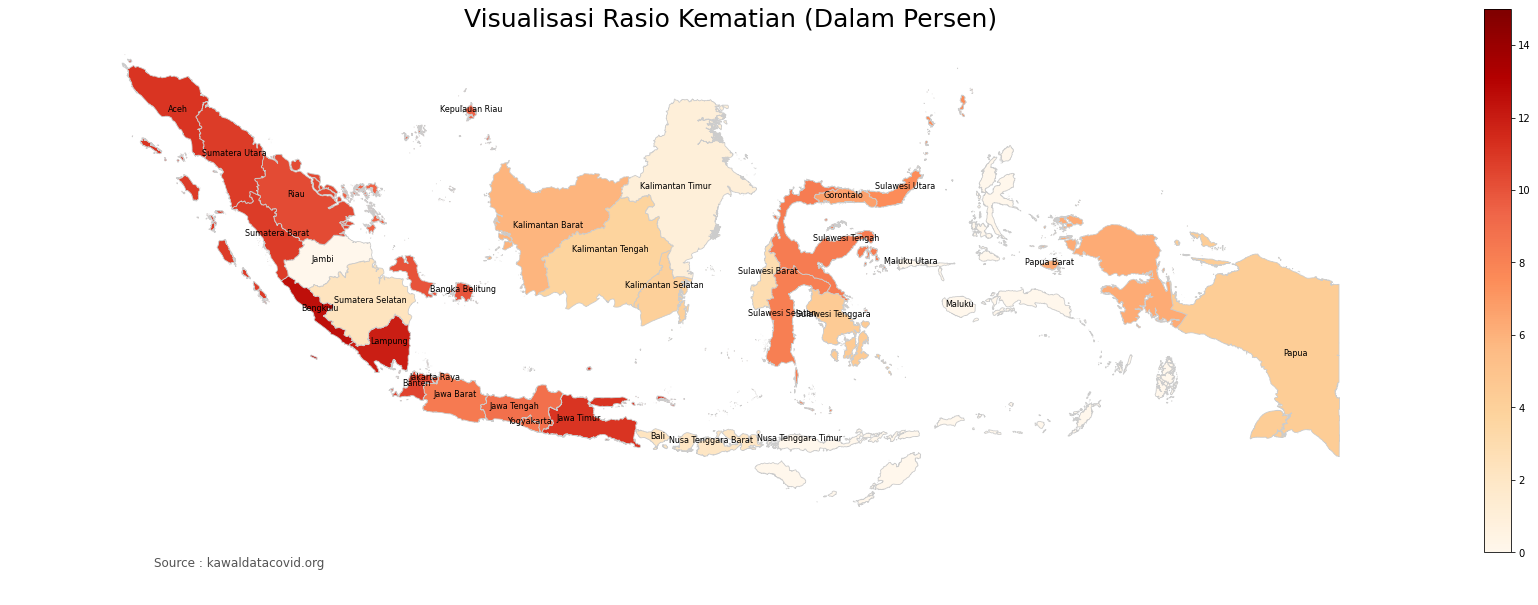

In [44]:
values = 'Rasio'

vmin, vmax = 0, 15
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')

title = 'Visualisasi {} Kematian (Dalam Persen)'.format(values)
ax.set_title(title, fontdict={'fontsize':'25',
                              'fontweight':'3'})

ax.annotate('Source : kawaldatacovid.org', xy=(0.1,.08),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=12,
            color='#555555')

sm = plt.cm.ScalarMappable(cmap='OrRd',
norm=plt.Normalize(vmin=vmin, vmax=vmax))

cbar =  fig.colorbar(sm)

# Add Labels
df_join['coords'] = df_join['geometry'].apply(lambda x: x.representative_point().coords[:])
df_join['coords'] = [coords[0] for coords in df_join['coords']]
for idx, row in df_join.iterrows():
    plt.annotate(s=row['Provinsi_Asal'],
                 xy=row['coords'],
                 horizontalalignment='center',
                 fontsize=8,
                 color='black')

df_join.plot(column=values, cmap='OrRd',
             linewidth=0.8,
             ax=ax,
             edgecolor='0.8',
             norm=plt.Normalize(vmin=vmin, vmax=vmax))


---

# Thank You

<p>Copyright &copy;  <a href=https://github.com/farhanalfaa/covid19-visualization>Visdat-2020</a></p>